# Importing and downloading important models

In [ ]:
pip install indic-nlp-library

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from nltk.tokenize import RegexpTokenizer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer

IndicNLP is a Python library that provides natural language processing tools for various Indic languages. Here's a list of some of the languages supported by IndicNLP:

Assamese (as)

Bengali (bn)

Gujarati (gu)

Hindi (hi)

Kannada (kn)

Kashmiri (ks)

Malayalam (ml)

Manipuri (mni)

Marathi (mr)

Nepali (ne)

Odia (or)

Punjabi (pa)

Sanskrit (sa)

Tamil (ta)

Telugu (te)

Urdu (ur)

The library provides tools for tasks such as tokenization, stemming, lemmatization, named entity recognition, part-of-speech tagging, and more. Note that not all languages have all the tools available, and some languages may have more limited functionality than others.

In [ ]:
import nltk
from indicnlp.tokenize import indic_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('stopwords', download_dir='/root/nltk_data/corpora')

[nltk_data] Downloading package stopwords to
[nltk_data]     /root/nltk_data/corpora...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Loding the Dataset

In [ ]:
train_data=pd.read_csv("https://github.com/Srushti-S/KaggleWars/raw/main/train.csv")
train_data.head()

,Review,Rating
0,Great game when i was a kid I grew up watching...,5
1,Nice game,1
2,Balo game but bholo laguchi khelibaku gote khu...,5
3,This is the worst computer cheating game I've ...,1
4,Great,5


Getting insights about the dataset

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  21000 non-null  object
 1   Rating  21000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 328.2+ KB


In [ ]:
train_data.describe()

,Rating
count,21000.000000
mean,3.849667
std,1.602988
min,1.000000
25%,3.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
train_data.value_counts

<bound method DataFrame.value_counts of                                                   Review  Rating
0      Great game when i was a kid I grew up watching...       5
1                                              Nice game       1
2      Balo game but bholo laguchi khelibaku gote khu...       5
3      This is the worst computer cheating game I've ...       1
4                                                  Great       5
...                                                  ...     ...
20995          افضل لعبة و لكن اريد ان يكون شجرة الجواهر       5
20996                             Very nice and enjoy!!!       4
20997  It has lots of different games depending on yo...       5
20998  Has several very frustrating bugs not present ...       3
20999  Paying for ads? I paid for no ads, yet I have ...       2

[21000 rows x 2 columns]>

<Axes: xlabel='Rating', ylabel='count'>

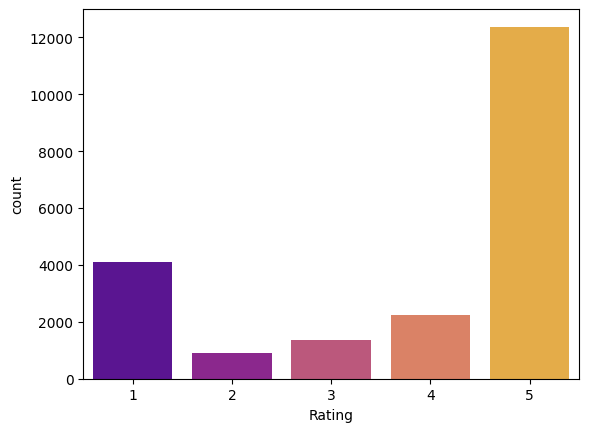

In [ ]:
#countplot to get insights about ratings of the app
sns.countplot(x ='Rating', data = train_data, palette ='plasma')

In [ ]:
train_data["Rating"].value_counts()

5    12376
1     4120
4     2233
3     1369
2      902
Name: Rating, dtype: int64

# Data Preprocessing

In [ ]:
# Using regular expression
train_data['Review'] = train_data['Review'].str.lower().str.replace('[^\w\s]','').str.replace('\d+', '').str.strip()

<ipython-input-14-80ba3be00d7a>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['Review'] = train_data['Review'].str.lower().str.replace('[^\w\s]','').str.replace('\d+', '').str.strip()


In [ ]:
# Creating a dictionary for stopwords of all inidc languges
stopwords_dict = {
    'hi': stopwords.words('english'),
    'bn': stopwords.words('english'),
    'te': stopwords.words('english'),
    'ta': stopwords.words('english'),
    'ml': stopwords.words('english'),
    'mr': stopwords.words('english'),
    'pa': stopwords.words('english'),
    'gu': stopwords.words('english'),
    'or': stopwords.words('english')
}

In [ ]:
train_label = train_data.iloc[:,-1]

In [ ]:
train_label

0        5
1        1
2        5
3        1
4        5
        ..
20995    5
20996    4
20997    5
20998    3
20999    2
Name: Rating, Length: 21000, dtype: int64

In [ ]:
# Remove punctuation, stop words, and convert text to lowercase; Tokenization

def preprocess_text(text, lang):
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)
    tokens = [token for token in tokens if token.lower() not in stopwords_dict[lang]]
    return ' '.join(tokens)

languages = ['hi', 'bn', 'te', 'ta', 'ml', 'mr', 'pa', 'gu', 'or']
for lang in languages:
    train_data['Review'] = train_data['Review'].apply(lambda x: preprocess_text(x, lang))
    
train_data['Review'] = train_data['Review'].str.lower()

In [ ]:
#Splitting the dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(train_data['Review'], train_data['Rating'], test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
# Train a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

y_pred = rf_model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.95      0.95      0.95       852
           2       1.00      0.91      0.95       172
           3       0.97      0.78      0.86       292
           4       0.98      0.79      0.88       429
           5       0.93      0.99      0.96      2455

    accuracy                           0.94      4200
   macro avg       0.97      0.88      0.92      4200
weighted avg       0.95      0.94      0.94      4200



Evaluating the model

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)

Accuracy:  0.9435714285714286


In [ ]:
confusion_mat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', confusion_mat)

Confusion Matrix:
 [[ 806    0    1    1   44]
 [   8  157    0    0    7]
 [  17    0  227    0   48]
 [   8    0    0  340   81]
 [  12    0    5    5 2433]]


# Trainging the model for actual test dataset

In [ ]:
test_data=pd.read_csv("https://github.com/Srushti-S/KaggleWars/raw/main/test.csv")
test_data.head()

,Review
0,This used to be my favorite game and it is sti...
1,Every single time i put the online multi-playe...
2,Determined to make us watch ads! Wouldn't be a...
3,Super great running game
4,"Hello NetEase, I really loved the game it dese..."


In [76]:
X_test = test_data['Review']

# Using regular expression, removing stopwords, performing tokenization, converting senetence into lower case
train_data['Review'] = train_data['Review'].str.lower().str.replace('[^\w\s]','').str.replace('\d+', '').str.strip()

def preprocess_text(text, lang):
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)
    tokens = [token for token in tokens if token.lower() not in stopwords_dict[lang]]
    return ' '.join(tokens)

languages = ['hi', 'bn', 'te', 'ta', 'ml', 'mr', 'pa', 'gu', 'or']
for lang in languages:
    train_data['Review'] = train_data['Review'].apply(lambda x: preprocess_text(x, lang))
    
train_data['Review'] = train_data['Review'].str.lower()

# Vectorize the text data
X_predict_test = vectorizer.transform(X_test)

# Make predictions on the test data and round to whole numbers
test_pred = rf_model.predict(X_predict_test)
test_pred = [round(Rating) for Rating in test_pred]

# Add the predicted ratings to the test data

test_data['Rating'] = test_pred


<ipython-input-76-09cf78434bdd>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['Review'] = train_data['Review'].str.lower().str.replace('[^\w\s]','').str.replace('\d+', '').str.strip()


In [80]:
#Creating submission.csv file
import numpy as np

length = len(test_pred)

ids = np.arange(length)

df = pd.DataFrame({'Id': ids, 'Rating': test_pred})

# Output the test data with the predicted ratings
df.to_csv('submission.csv', index=False)